# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Theory-of-two-body-motion-under-a-central-inverse-square-force" data-toc-modified-id="Theory-of-two-body-motion-under-a-central-inverse-square-force-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Theory of Two-Body motion under a central inverse-square force</a></div><div class="lev1 toc-item"><a href="#Numerically-solving-the-orbit-equation-with-RK4-method" data-toc-modified-id="Numerically-solving-the-orbit-equation-with-RK4-method-1"><span class="toc-item-num">2&nbsp;&nbsp;</span>Numerically solving the orbit equation with RK4 method</a></div><div class="lev1 toc-item"><a href="#Creating-an-Animation-for-the-motion-of-two-bodies" data-toc-modified-id="Creating-an-Animation-for-the-motion-of-two-bodies-1"><span class="toc-item-num">3&nbsp;&nbsp;</span>Creating an Animation for the motion of two bodies</a></div><div class="lev1 toc-item"><a href="#Analysing-errors-in-RK4-method-for-different-step-sizes" data-toc-modified-id="Analysing-errors-in-RK4-method-for-different-step-sizes-1"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analysing errors in RK4 method for different step sizes</a></div>

In [1]:
# !pip install numpy
# !pip install matplotlib
# !pip install scipy
# !pip install ipympl
# !pip install plotly


# Theory of two body motion under a central inverse square force

- Lagrangian for a system of such two bodies is 

$$ L(\vec{r}_1,\vec{r}_2,\vec{\dot{r}}_1,\vec{\dot{r}}_2) = {1 \over 2} m_1 (\vec{\dot{r}}_1)^2 + {1 \over 2} m_2 (\vec{\dot{r}}_2)^2 + {Gm_1m_2 \over |\vec{r}_1 - \vec{r}_2|}$$

- In terms of center and relative position and center of mass coordinates, 

$$\vec{R}_{cm} = { m_1\vec{r}_1 + m_2 \vec{r_2} \over m_1 + m_2},\hspace{1cm} \vec{r} = \vec{r}_2 - \vec{r}_1 $$

$$ \vec{r}_1 = \vec{R} - \left({m_2 \over m_1 + m_2}\right)\vec{r},\hspace{1cm}\vec{r}_2 = \vec{R} + \left({m_1 \over m_1 + m_2}\right)\vec{r} $$

- Lagrangian in these new coordinates becomes

$$L(\vec{R},\vec{r}) = {1 \over 2}(m_1 + m_2) (\vec{\dot{R}})^2 + {1 \over 2} \mu (\vec{\dot{r}})^2 + {Gm_1m_2 \over |\vec{r}|}$$

Where, $\mu = {m_1m_2 \over m_1 + m_2}$ is the "reduced mass" for the $m_1,m_2$ system.

- From Lagrange equations, it can be seen that $\vec{R}$ is cyclic and CoM is at rest or moving at constant momentum.
- None of the equations for $\vec{r}$ contain $\vec{R}$ or $\vec{\dot{R}}$.
- So, to focus on the $\vec{r}$ equations, we can just work with a new Lagragian without the first term containing CoM.  

$$ L(\vec{r}) = {1 \over 2} \mu (\vec{\dot{r}})^2 + {Gm_1m_2 \over r}$$

- This new Lagrangian is exactly what would be expected if we had a fixed center of force with a single particle at a distance r from it, having a mass $\mu$.
- Thus, central force motion of two bodies can always be reduced to an equivalent one body problem.

- Using spherical coordinates, 

$$ L = {1 \over 2}\mu\left(\dot{r}^2 + r^2\dot{\theta}^2 + r^2 sin^2{\theta} \dot{\phi}^2\right) + {Gm_1m_2 \over r}$$

- Lagrangian equations give

$$p_{\theta} = {\partial L \over \partial \dot{\theta}} = \mu r^2\dot{\theta}, \hspace{1cm}\dot{p_{\theta}} = {d \over dt}\left(\mu r^2\dot{\theta}\right) = 0 $$

$$p_{\phi} = {\partial L \over \partial \dot{\phi}} = \mu r^2sin^2{\theta}\dot{\phi}, \hspace{1cm}\dot{p_{\phi}} = {d \over dt}\left(\mu r^2sin^2{\theta}\dot{\phi}\right) = 0 $$

$$\mu r^2\dot{\theta} = l,\hspace{1cm}\mu r^2sin^2{\theta}\dot{\phi} = k$$

- The conservation of angular momentum implies that the orbits lie in a “plane".
- To see this, fix your attention on a particular instant and orient the coordinates so $\dot{\phi} = 0$ at that instant and the particle is at $\phi = 0$, i.e., so that $\vec{v}$ lies in the meridional “plane” $\phi = 0$.
- From the equation above, this means $k=0$ and it stays zero for all its motion. This clealry implies planar motion. Lets assume the plane is a meridial plane with only $\theta$ and $r$ as our relevant parameters.

The Lagrange equation for radial coordinate is 

$${d \over dt}\left(\mu\dot{r}\right) - \mu r\dot{\theta}^2 = {Gm_1m_2 \over r^2}, \hspace{1cm}\mu \ddot{r} - {l^2 \over \mu r^3} = {Gm_1m_2 \over r^2} $$

Finally, we now eliminate $dt$ using


$$l dt = \mu r^2 d\theta, \hspace{1cm}{l \over r^2} {d \over d\theta} \left({l \over \mu r^2}{dr \over d\theta}\right) - {l^2 \over \mu r^3} = {Gm_1m_2 \over r^2} $$

With the substitution $u=1/r$,

$$ {d^2 u \over d \theta^2} + u = {\mu \over l^2} Gm_1m_2 $$

- If $v(\theta) = u'(\theta)$, this gives
$$ \begin{cases}
u'(\theta) = v(\theta) \\
v'(\theta) = - u(\theta) + c
\end{cases} $$

- Vectorially, if $y(\theta) = [u(\theta), v(\theta)]$, then the equation is $y' = f(\theta, y)$ where $f(\theta, y) = [y_2(\theta), - y_1(\theta) - c]$.

---

# Numerically solving the orbit equation with RK4 method

In [2]:
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import display, clear_output
from IPython.core.display import HTML



HTML("""
<style>
.jp-RenderedImage {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:

def orbit_new(y,phi,b,c):
    return np.array([y[1], -b*y[0] + c])
# Any second order differential equation can be broken down into two first order differential equations
def rungekutta4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2., t[i] + h / 2., *args)
        k3 = f(y[i] + k2 * h / 2., t[i] + h / 2., *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return y

In [4]:
G = 1
# m1,m2 = 1/G, 5

m1 = 1
m2 = 5

# G0, m_0 = G, np.sqrt(m1,m2)


mu = m1*m2/(m1+m2)

k= G*m1*m2
print(mu)
omega0=1.63*2
y0 = np.array([2, 0])



l = mu*omega0/(y0[0]**2)
Veff0 = (-k*y0[0]) + ((y0[0]**2)*(l**2)/(2*mu))

E0 = Veff0
b=1
c= mu*k/l**2
# print(l,c)


# term1 = (-k*y0[0]) 
# term2 = ((y0[0]**2)*(l**2)/(2*mu))



# print(term1,term2)

print(l,E0)



# def Veff(arr,k0,l0,mu0):
#     output = (-k0/arr) + l0**2/((2*mu0)*(arr**2))
#     return output
   
# r_test = np.linspace(0.0001,1,10**5)
# fig, ax = plt.subplots()
# ax.plot(r_test,Veff(r_test,k,l,mu))
# ax.grid(True)
# plt.show()

0.8333333333333334
0.6791666666666667 -8.892958333333333


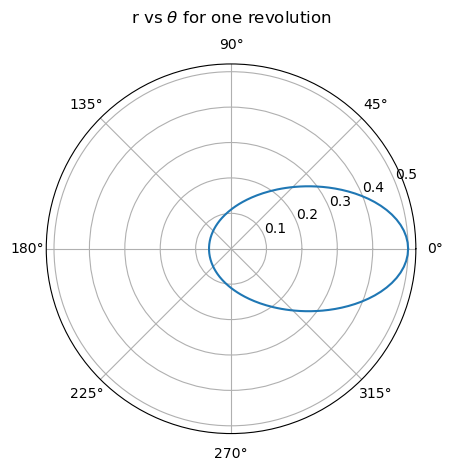

In [5]:
t2 = np.linspace(0,2*np.pi,181)
# print(t2[-1])
# print(t2)    
# print(t2[181],t2[359:362])
sol2 = rungekutta4(orbit_new, y0, t2, args=(b,c))

# print(sol2.shape)
u = sol2[:,0]
r = 1/u

r_dot = -1*sol2[:,1]/sol2[:,0]**2


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(t2, r)
# ax.set_rmax(2)
# ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
# ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title(r"r vs $\theta$ for one revolution", pad=30)
plt.show()

# Creating an Animation for the motion of two bodies

- With center of mass the origin of my coordinate system, I now plot the motion of two bodies. 

In [6]:
r1 = (m2/(m1+m2))*r
r2 = -(m1/(m1+m2))*r

x1, y1 = r1*np.cos(t2), r1*np.sin(t2)
x2, y2 = r2*np.cos(t2), r2*np.sin(t2)

print(x2[0],y2[0])

-0.08333333333333333 -0.0


In [7]:
# fig, ax = plt.subplots()

# ax.plot(x1,y1,label='Body 1 Orbit',linestyle='dashed',alpha=0.5)
# ax.plot(x2,y2,label='Body 2 Orbit',linestyle='dashed',alpha=0.5)
# ax.set_title('Orbits of two bodies with mass ratio 1:5')
# ax.grid(True,alpha=0.25)
# ax.set_xlim(-0.1, 0.5)  
# ax.set_ylim(-0.3, 0.3)
# # ax.scatter(x1,y1,s=5)
# # ax.scatter(x2,y2,s=5)

# sc = ax.scatter([x1[0], x2[0]], [y1[0], y2[0]], color=['blue', 'red'], s=[50,250])

# plt.legend()


# # Animation function
# def animate(i):
#     sc.set_offsets([[x1[i], y1[i]], [x2[i], y2[i]]])  # Update positions

# # Create animation
# anim = animation.FuncAnimation(fig, animate, frames=len(x1), interval=50)


# anim.save("orbit_animation.gif", writer="pillow", fps=20)

# plt.show()


<div align="center">
    <img src="orbit_animation.gif" width="650">
</div>

# Analysing errors in RK4 method for different step sizes

- According to the theory, total energy is a constant of motion. But numerical methods inherently have truncation errors due to approximating derivatives as straight lines.
- This error is compounded with each step and hence the constants of motion do not remain constant after certain number of steps.
- Here I compare the how the total energy looks like after each revolution for different step sizes. 

In [8]:
G = 1
m1 = 1
m2 = 5

mu = m1*m2/(m1+m2)

k= G*m1*m2
print(mu)
omega0=1.63*2
y0 = np.array([2, 0])

l = mu*omega0/(y0[0]**2)
Veff0 = (-k*y0[0]) + ((y0[0]**2)*(l**2)/(2*mu))

E0 = Veff0
b=1
c= mu*k/l**2

print(l,E0)


0.8333333333333334
0.6791666666666667 -8.892958333333333


In [9]:
b=1

Z=np.linspace(20,200,10)
h_all = []
E_per_2pi = [] 

for z in Z:
    # print(z)
    h = 2*np.pi/z
    h_all.append(h)
    n0 = 10
    n_total = (n0*z) + 1
    # print(n_total)
    n_total = int(n_total)
    
    
    theta_limit = 2*n0*np.pi
    
     
    t2 = np.linspace(0,theta_limit,n_total)
    # print(t2[-1])
    # print(t2)
    theta = list(t2)
    
    
    
        
    # print(t2[181],t2[359:362])
    sol2 = rungekutta4(orbit_new, y0, t2, args=(b,c))
    
    # print(sol2.shape)
    u = sol2[:,0]
    r = 1/u
    
    r_dot = -1*sol2[:,1]/sol2[:,0]**2
    
    E = 0.5*mu*r_dot**2 - (k*u) + ((u*l)**2/2*mu)
    
    E_check = []
    for i in range(n0):
        for p in range(len(theta)):
            if theta[p] == 2*i*np.pi:
                j = p
            elif (2*i*np.pi - theta[p-1])*(2*i*np.pi - theta[p])<0:
                j = p

        E_total = E[j]
        # print(theta[j])
        # print(h,theta[j],E_total)
        E_check.append(E_total)
    # print(E_check)
    E_check = np.array(E_check)
    # print(E_check)
    E_per_2pi.append(E_check)

    # print(len(E_per_2pi))

E_per_2pi = np.array(E_per_2pi)
h_all  = np.array(h_all)


# print(u)
# print(r)



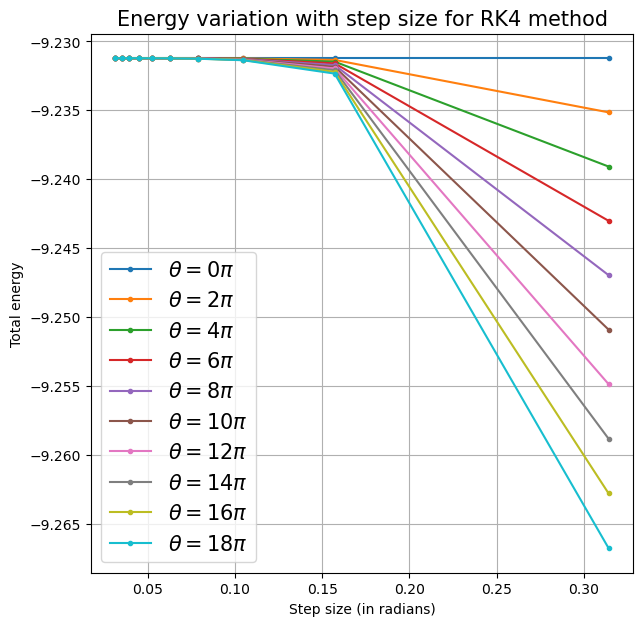

In [10]:
fig,ax = plt.subplots(figsize=(7,7))
for i in range(n0):
    ax.plot(h_all,E_per_2pi[:,i],marker='.',label=r'$\theta = %d\pi$'%(2*i))
ax.set_xlabel('Step size (in radians)',fontsize=10)
ax.set_ylabel('Total energy')
ax.set_title('Energy variation with step size for RK4 method', fontsize=15)
ax.legend(fontsize=15)
ax.grid(True)
plt.savefig('energy_errors.png')